In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use(style='ggplot')

In [8]:
training_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')
training_dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
training_dataset.shape

(1460, 81)

In [7]:
training_dataset.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

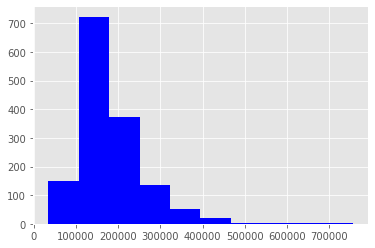

In [8]:
plt.hist(training_dataset.SalePrice, color='blue')
plt.show()

In [10]:
numeric_features = training_dataset.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

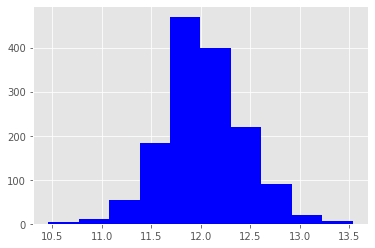

In [11]:
target = np.log(training_dataset.SalePrice)
plt.hist(target, color='blue')
plt.show()

In [13]:
numeric_features = training_dataset.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [15]:
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[:5])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64


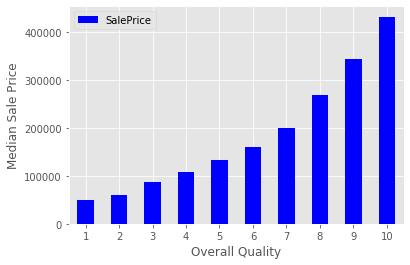

In [16]:
quality_pivot =training_dataset.pivot_table(index='OverallQual',
                                           values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

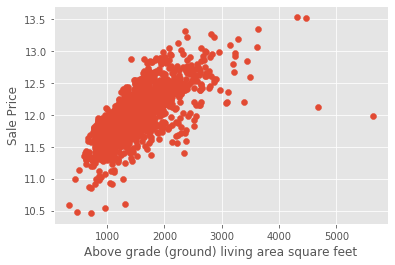

In [18]:
plt.scatter(x=training_dataset['GrLivArea'], y=np.log(training_dataset['SalePrice']))
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

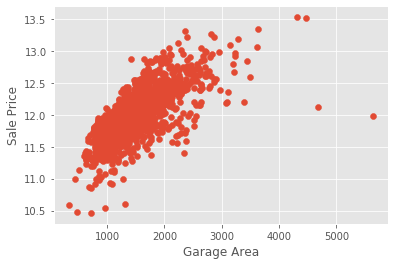

In [19]:
plt.scatter(x=training_dataset['GrLivArea'], y=np.log(training_dataset['SalePrice']))
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

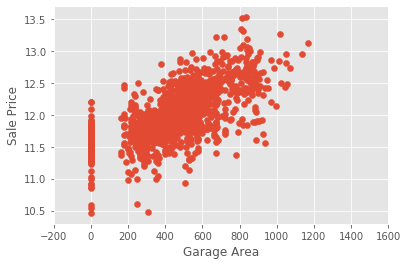

In [20]:
training_dataset = training_dataset[training_dataset['GarageArea'] < 1200]
plt.scatter(x=training_dataset['GarageArea'], y=np.log(training_dataset.SalePrice))
plt.xlim(-200, 1600)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()
                                                       

In [24]:
nulls = pd.DataFrame(training_dataset.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [27]:
categoricals = training_dataset.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [9]:
training_dataset['enc_Street'] = pd.get_dummies(training_dataset.Street, drop_first=True)
test_dataset['enc_Street'] = pd.get_dummies(test_dataset.Street, drop_first=True)
print ('Encoded: \n')
print (training_dataset.enc_Street.value_counts())

Encoded: 

1    1454
0       6
Name: enc_Street, dtype: int64


In [12]:
data = training_dataset.select_dtypes(include=[np.number]).interpolate().dropna()
sum(data.isnull().sum() != 0)

0

In [14]:
y = np.log(training_dataset.SalePrice)
x = data.drop(['SalePrice', 'Id'], axis=1)

In [19]:

x_train, x_test, y_train, y_test = train_test_split(
                          x, y, random_state=42, test_size=0.3)

In [20]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)

In [21]:
print ( " R^2 is: \n", model.score(x_test, y_test))
predictions = model.predict(x_test)
print (' RMSE is \n', mean_squared_error(y_test, predictions))

 R^2 is: 
 0.8703640899237535
 RMSE is 
 0.02199223498991705


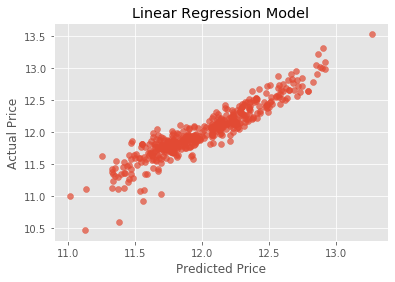

In [28]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7
           )
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [31]:
submission = pd.DataFrame()
submission['Id'] = test_dataset.Id
feats = test_dataset.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()
predictions = model.predict(feats)
final_predictions = np.exp(predictions)
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])
submission['SalePrice'] = final_predictions
submission.head()

Original predictions are: 
 [11.67519369 11.68005038 12.03330896 12.18493951 12.10439456] 

Final predictions are: 
 [117617.56774986 118190.18945016 168267.28304477 195817.72035267
 180664.06021339]


,Id,SalePrice
0,1461,117617.567750
1,1462,118190.189450
2,1463,168267.283045
3,1464,195817.720353
4,1465,180664.060213


In [32]:
submission.to_csv('submission1.csv', index=False)